# NLP Based clustering

In [1]:
import pandas as pd
import os

InputPath = 'C:/Users/pujasingh88/Documents/Puja/Learning/clustering/'
filename = 'BOM_DATASET.csv'

## Load the data 

In [2]:
data = pd.read_csv(InputPath+filename,encoding='cp850')

## Preprocess 
We will use product description as base for clustering

In [3]:
data = data.dropna()
data['feat1'] = data['COMPONENT_DESCRIPTION'].replace('[^a-zA-Z]', ' ', regex=True).replace(' +', ' ', regex=True)
data['feat1'].head(10)

0         SCRAP C Brass UNPLATED
1                  ST C WOP X H 
2    SCRAP C Phos Brz PLATED TIN
3                  ST C PL X HR 
4          Interleaf Paper in lb
5          CARDBOARD REEL X X in
6         SCRAP C Brass UNPLATED
7                  ST C WOP X H 
8    SCRAP C Phos Brz PLATED TIN
9               ST C PL X TW HR 
Name: feat1, dtype: object

## Vectorize text data

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_idf_vectorizor = TfidfVectorizer(analyzer='word', min_df=3)
tf_idf = tf_idf_vectorizor.fit_transform(data['feat1'])

In [5]:
tf_idf[0:3]

<3x3466 sparse matrix of type '<class 'numpy.float64'>'
	with 10 stored elements in Compressed Sparse Row format>

In [6]:
words=tf_idf_vectorizor.get_feature_names()
print("Number of unique Words : {} \n\nFirst 100 words : \n\n{}".format(len(words), words[:100]))

Number of unique Words : 3466 

First 100 words : 

['aa', 'aab', 'aaz', 'ab', 'abrasionresistant', 'abs', 'ac', 'acc', 'acciaio', 'ace', 'acemox', 'acetate', 'acid', 'acm', 'acome', 'acoustic', 'acrylic', 'act', 'actl', 'actuator', 'acu', 'acw', 'ad', 'adapter', 'adc', 'additive', 'adesiva', 'adh', 'adhesi', 'adhesive', 'adic', 'adj', 'ae', 'aec', 'aerial', 'aessx', 'af', 'afk', 'afs', 'after', 'ag', 'agganci', 'aggancio', 'agr', 'ah', 'air', 'airbag', 'airhole', 'aisi', 'aj', 'ak', 'aklv', 'akulon', 'al', 'algodon', 'align', 'aligner', 'alignment', 'aling', 'all', 'alloy', 'alloys', 'alone', 'alpacca', 'alt', 'alternex', 'alum', 'aluminum', 'aluminumized', 'am', 'amarillo', 'amb', 'amber', 'ambient', 'amct', 'amk', 'ammo', 'amp', 'ampc', 'ampt', 'amt', 'an', 'and', 'angle', 'angled', 'anneal', 'anode', 'anodes', 'ant', 'antenna', 'anti', 'antista', 'antistat', 'antistati', 'antistatic', 'antitarnish', 'ao', 'ap', 'apet', 'appian']


In [7]:
tf_idf.shape

(285836, 3466)

## Find optimal number of clusters

In [8]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


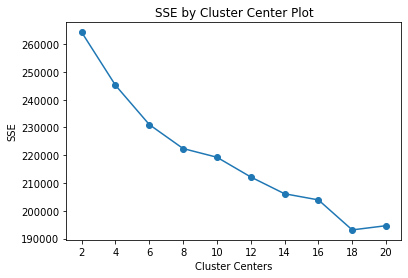

In [9]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=40).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(tf_idf, 20)

## Train Model using optimal number of clusters

In [10]:
model = MiniBatchKMeans(n_clusters=23).fit_predict(tf_idf)

## Get top words from each cluster

In [11]:
df = pd.DataFrame(tf_idf.todense()).groupby(model).mean()

In [12]:
import numpy as np

def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    #print(df)
    top_words = []
    for i,r in df.iterrows():
        top_words.append(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))
    return top_words
            
top_words = get_top_keywords(tf_idf, model, tf_idf_vectorizor.get_feature_names(), 20)

In [13]:
top_words

['gray,gre,gnvl,grease,gree,goldplated,hybrid,black,cmc,blu,rustred,ngpcm,way,uscar,ltblue,hyb,ckt,mx,seal,peripheral',
 'graphic,grease,gre,gra,ckt,squib,ltgy,red,cs,rcpt,uscar,assy,blk,cmc,ptc,mm,mini,sld,mx,cpa',
 'gra,grams,gry,graphic,grom,cover,in,rsc,sheet,outer,cap,box,cm,no,squib,corrugated,reel,flute,mm,carton',
 'goldplated,gp,gpcm,gpec,green,gps,gq,gr,gra,grams,graphic,gray,gre,grease,gpt,mm,white,label,nw,avery',
 'blue,royal,sld,rcm,fem,red,lblu,rust,interfacial,ring,hyb,gpcm,grommet,ltblue,bld,rcpt,mx,ckt,matte,seal',
 'chrome,etp,other,cunisi,bare,bronzes,un,ot,coppers,alloy,brz,phos,copper,tin,phosphor,bronze,unplated,brass,plated,scrap',
 'uf,stone,yellow,blue,lcp,brown,light,dark,gray,sps,nylon,natural,polyester,hb,regrind,pa,black,pbt,ul,gf',
 'conn,solderon,opt,cmc,gpcm,for,sn,reel,lever,plastic,pin,tin,way,rcpt,hsg,st,housing,term,mm,ckt',
 'term,brn,fem,sb,all,lever,ltgy,mate,assist,cs,slide,hyb,rcpt,bld,cap,grom,hsng,ckt,mx,blk',
 'gq,greggio,gr,gre,gregg,green,

## Save Predictions

In [43]:
data['prediction']=model

In [109]:
# os.chdir('c:\\Users\\pujasingh88\\Documents\\Puja\\Learning\\clustering')

In [44]:
data.to_csv("Results_25042021_clusters.csv")